In [33]:
import numpy as np

from itertools import product

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
class Perceptron:
    
    def __init__(self, epsilon, n_steps, alpha = 0, w0 = None):
        if w0 == None:
            self.w = np.random.normal(size = 2).reshape((2, ))
        else:
            self.w = w0
            
        self.alpha = alpha
        self.epsilon = epsilon
        self.n_steps = n_steps
        
    def forward(self, X):
        return sigmoid(X @ self.w)
        
    def loss(self, preds, y):
        G = -(y @ np.log(preds) + (1 - y) @ np.log(1 - preds))
        EW = self.w @ self.w / 2
        return G + self.alpha * EW
        
    def grad(self, X, y):
        y_pred = self.forward(X)
        err = y - y_pred
        return -X.T @ err + self.alpha * self.w
        
    def HMC_update(self, X, y):
        p = np.random.normal(size = self.w.shape)
        w_buf = self.w
        H_old = p @ p / 2 + self.loss(self.forward(X), y)
        
        for i in range(self.n_steps):
            p -= self.epsilon/2 * self.grad(X, y)
            self.w += self.epsilon * p
            p -= self.epsilon/2 * self.grad(X, y)
            
        H_new = p @ p/2 + self.loss(self.forward(X), y)
        dH = H_new - H_old
        
        if dH > 0 and np.random.random() > np.exp(-dH):
            self.w = w_buf

In [12]:
def generate_data(size,
                  mu0 = [1, 1], 
                  sigma0 = [[0.5, 0], [0, 0.5]],
                  mu1 = [-1, -1],
                  sigma1 = [[0.5, 0], [0, 0.5]]):
    
    X = np.vstack((np.random.multivariate_normal(mu0, sigma0, size = size), 
                   np.random.multivariate_normal(mu1, sigma1, size = size)))
    
    y = np.hstack((np.array([0] * size), np.array([1] * size)))
    
    return X, y

In [13]:
X, y = generate_data(10)

In [23]:
perceptron = Perceptron(0.05, 20, alpha = 0.1)

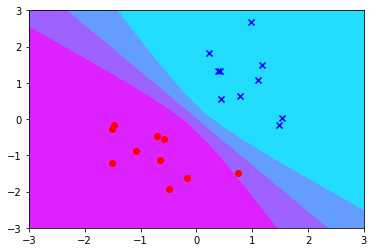

In [32]:
plt.ylim(-3, 3)
plt.ylim(-3, 3)

nx = 20
steps = np.linspace(-3, 3, nx)
X_, Y_ = np.meshgrid(steps, steps)
Z_ = np.zeros_like(X_)
inp = np.array([np.array([i, j]) for i, j in product(steps, steps)]).reshape((nx, nx, 2))

n_traj = 1000

for i in range(n_traj):
    perceptron.HMC_update(X, y)
    Z_ += perceptron.forward(inp)
    
Z_ /= n_traj

plt.contourf(X_, Y_, Z_, levels = [0, 0.27, 0.5, 0.73, 1], cmap = 'cool')
plt.scatter(X[:, 0][:10], X[:, 1][:10], c = 'blue', marker = 'x')  
plt.scatter(X[:, 0][10:], X[:, 1][10:], c = 'red', marker = 'o')  

In [40]:
perceptron = Perceptron(0.05, 20, alpha = 0.1)

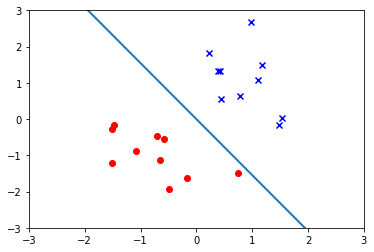

In [44]:
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=2)

ax.scatter(X[:, 0][:10], X[:, 1][:10], c = 'blue', marker = 'x')  
ax.scatter(X[:, 0][10:], X[:, 1][10:], c = 'red', marker = 'o')
x_ = np.array([-3, 3])
 
def init():
    line.set_data([], [])
    return line,
    
def animate(i):
    perceptron.HMC_update(X, y)
    w1, w2 = perceptron.w
    line.set_data(x_, -x_*(w2 / w1))
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
anim.save('weight_evolution.gif', writer='imagemagick')

plt.show()